In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_csv('/content/drive/MyDrive/ML_LP3/sales_data_sample.csv',encoding='unicode_escape')

In [6]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [7]:
df.shape

(2823, 25)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [9]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [10]:
df.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


In [11]:
df=df.drop(['ADDRESSLINE2','STATE','POSTALCODE','TERRITORY'],axis=1)

In [15]:
df['STATUS'].value_counts()

,count
STATUS,
Shipped,2617
Cancelled,60
Resolved,47
On Hold,44
In Process,41
Disputed,14


In [16]:
df['STATUS'] = df['STATUS'].replace('Shipped', 1)
df['STATUS'] = df['STATUS'].replace('Resolved', 2)
df['STATUS'] = df['STATUS'].replace('Cancelled', 3)
df['STATUS'] = df['STATUS'].replace('On Hold', 4)
df['STATUS'] = df['STATUS'].replace('Disputed', 5)
df['STATUS'] = df['STATUS'].replace('In Process', 6)

<ipython-input-16-0cebca907e12>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['STATUS'] = df['STATUS'].replace('In Process', 6)


Try doing graphs once

<Axes: xlabel='COUNTRY', ylabel='count'>

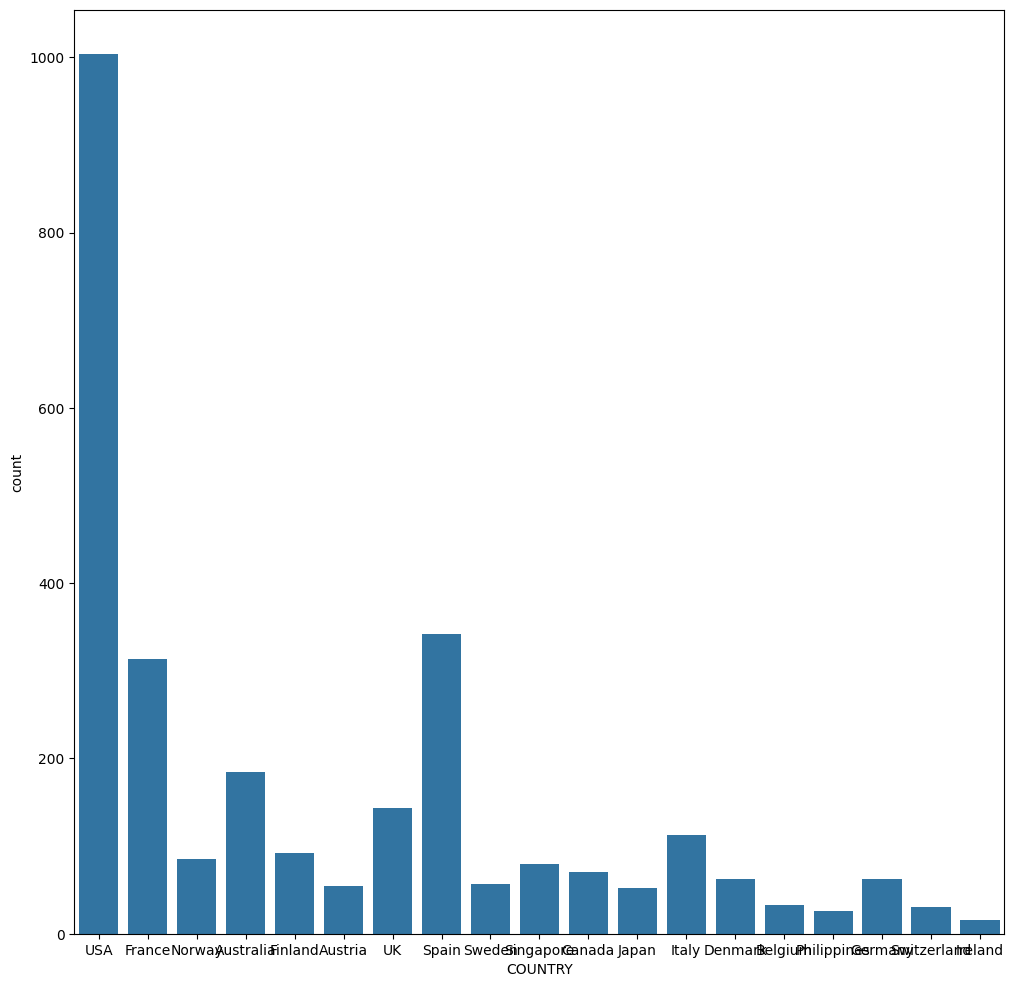

In [18]:
plt.figure(figsize=(12,12))
sns.countplot(x='COUNTRY',data=df)

<Axes: xlabel='PRODUCTLINE', ylabel='count'>

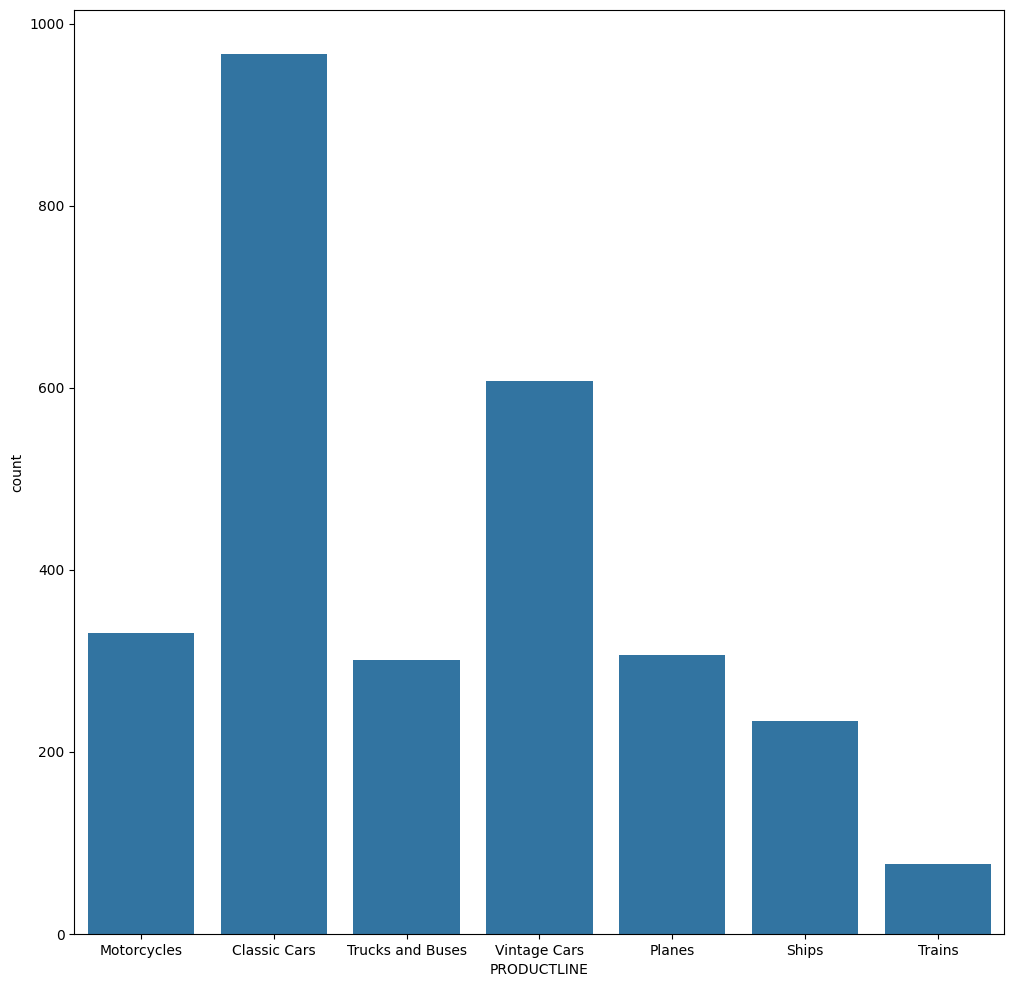

In [19]:
plt.figure(figsize=(12,12))
sns.countplot(x='PRODUCTLINE',data=df)

In [20]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'CITY', 'COUNTRY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [21]:
df=df.drop(['ORDERNUMBER','ORDERDATE','STATUS','QTR_ID','MONTH_ID','YEAR_ID','CUSTOMERNAME','PHONE','ADDRESSLINE1','CITY','CONTACTLASTNAME','CONTACTFIRSTNAME'],axis=1)

In [22]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,Motorcycles,95,S10_1678,USA,Medium


In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categories=['PRODUCTLINE','PRODUCTCODE','COUNTRY','DEALSIZE']
for cat in categories:
  df[cat]=le.fit_transform(df[cat])

In [25]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,1,95,0,18,2
1,34,81.35,5,2765.90,1,95,0,6,2
2,41,94.74,2,3884.34,1,95,0,6,1
3,45,83.26,6,3746.70,1,95,0,18,1
4,49,100.00,14,5205.27,1,95,0,18,1


In [26]:
sc=StandardScaler()
data=sc.fit_transform(df)

In [27]:
inertia=[]
K=range(1,11)

for k in K:
  kmeans=KMeans(n_clusters=k,random_state=45)
  kmeans.fit(data)
  inertia.append(kmeans.inertia_)

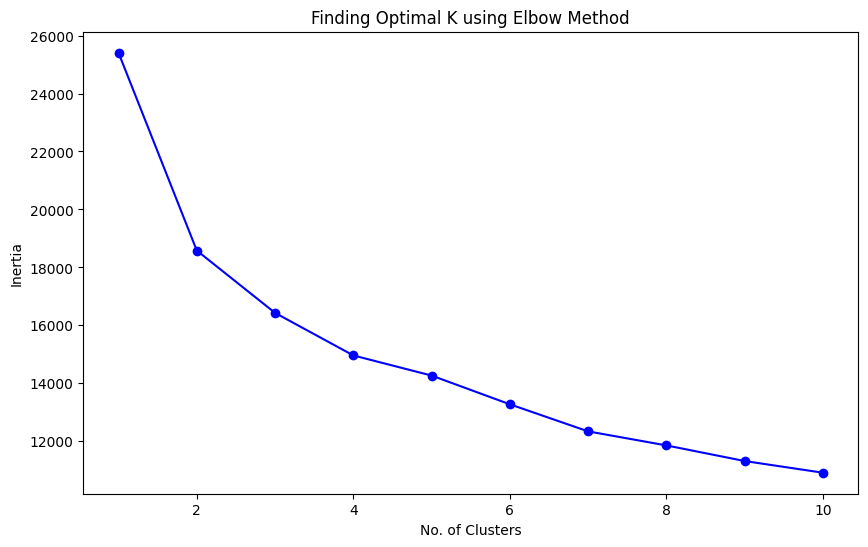

In [28]:
plt.figure(figsize=(10,6))
plt.plot(K,inertia,'-bo')
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.title('Finding Optimal K using Elbow Method')
plt.show()

In [29]:
optimal_k=3

In [32]:
kmeans=KMeans(n_clusters=3,random_state=42)
df['Cluster']=kmeans.fit_predict(data)

In [33]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE,Cluster
0,30,95.70,2,2871.00,1,95,0,18,2,0
1,34,81.35,5,2765.90,1,95,0,6,2,0
2,41,94.74,2,3884.34,1,95,0,6,1,2
3,45,83.26,6,3746.70,1,95,0,18,1,2
4,49,100.00,14,5205.27,1,95,0,18,1,2


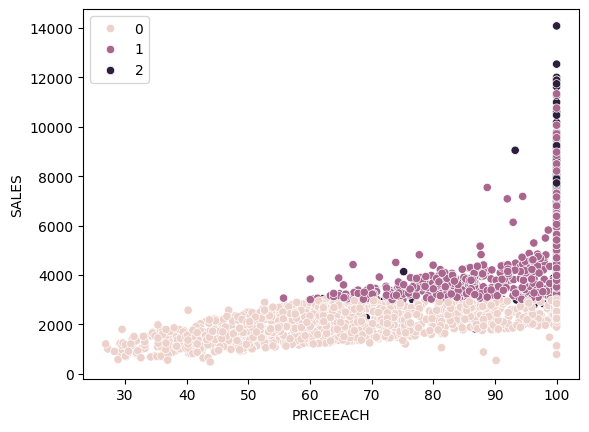

In [35]:
sns.scatterplot(x='PRICEEACH',y='SALES',data=df,hue='Cluster')
plt.legend()
plt.show()